# 🧪 Lab 1: Vectorized Logistic Regression (Binary Classification)

Welcome to your first vectorized machine learning lab! In this lab, we'll build a logistic regression classifier using **only NumPy**. We’ll go step-by-step — just like we did in the linear regression lab — but this time we’re classifying data into **two categories** (0 or 1).

---

## 🟦 Step 1: Create a Toy Dataset

We'll generate a small, random dataset where points are either class `0` or class `1`, based on a decision boundary.

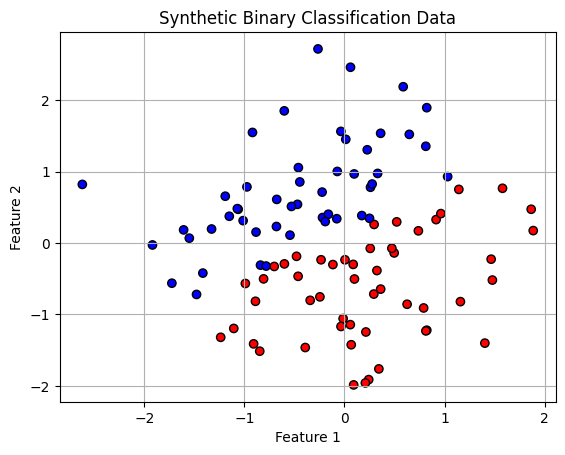

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
m = 100  # number of samples
X = np.random.randn(m, 2)  # 2 features

# Simulated weights for true boundary
true_w = np.array([[2], [-3]])
true_b = 0.5

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_prob = sigmoid(X @ true_w + true_b)
y = (y_prob > 0.5).astype(int)  # convert probabilities to 0/1 labels

### 🔍 Visualize the Data
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap='bwr', edgecolors='k')
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

🧪 Why are we creating this "toy dataset"?


We’re building a mini simulation — a small, fake world — where:

Each dot is a data point with two features (like height and weight).

The dot is either class 0 (blue) or class 1 (red).

We're pretending we already know the true rule (the weights and bias) that decides whether a point is red or blue.



This way, we can train our logistic regression model from scratch and later check if it learns the rule correctly!
It’s like giving the model a quiz where we already know the answer key.

⚙️ What does this code do?

true_w = np.array([[2], [-3]])
true_b = 0.5


These are the “true” weights and bias that decide where the class boundary lies. We're using them to generate labels (0 or 1) for our fake data points.


def sigmoid(z):
    return 1 / (1 + np.exp(-z))
🧠 What does sigmoid(z) do?
The sigmoid function takes a number (which can be very negative or positive) and squashes it between 0 and 1.

Think of it like a "confidence meter":

If the result is close to 1 → the model is confident the point is class 1 (red).

If the result is close to 0 → it’s confident it’s class 0 (blue).

If it’s around 0.5 → it’s unsure.

So sigmoid(z) turns a raw score (z) into a probability.


y_prob = sigmoid(X @ true_w + true_b)
y = (y_prob > 0.5).astype(int)
We compute the predicted probability using the true weights.

Then we say: "If the probability is above 0.5, assign class 1 (red), else class 0 (blue)".

This gives us: ✅ 100 data points
✅ Each with a label (red or blue)
✅ Generated from a known rule

🧠 Why is this helpful?
Because we now have:

Inputs X = features

Labels y = correct answers
➡️ So we can train a model and check if it learns the same decision rule we used to generate the labels.

🔍 Visualization
That last bit of code shows us a scatter plot of all data points:

Red = class 1

Blue = class 0

## Step 2: Initialize Parameters

We start with **zeros** for weights `w` and bias `b`.

In [5]:
w = np.zeros((2, 1))  # 2 features, so 2 weights
b = 0.0

📏 So where did the weights come from?


In [ ]:
true_w = np.array([[2], [-3]])
true_b = 0.5


These are "simulated weights" — meaning:

We picked them on purpose to define a decision boundary for the fake data.

It's like drawing an imaginary line on a piece of paper and saying:

"Everything above the line is class 1, everything below is class 0."

The weights define the slope and direction of that line (also called the decision boundary) in the 2D space.

🧠 Why [2], [-3]?

These values were just chosen arbitrarily to create a clear and learnable pattern.

[2], [-3] means that Feature 1 is positively weighted and Feature 2 is negatively weighted — so the model will give high scores to points where Feature 1 is high and Feature 2 is low.

Together with b = 0.5, they define the "rule" for separating the red vs. blue dots.

🧪 Why does this matter?
Because we're using it to:

Generate the labels for the dataset using the sigmoid function (to get a smooth probability).

Later, when we train our own model from scratch, we can test whether it learns something close to these weights, showing it understood the pattern.


In [4]:
If 2 * x1 - 3 * x2 + 0.5 > 0 → class 1 (red)
Else → class 0 (blue)

SyntaxError: invalid character '→' (U+2192) (<ipython-input-4-986e15262a7a>, line 1)

## 🟦 Step 3: Forward Propagation

This step predicts the output `ŷ` using the current `w` and `b`.

In [6]:
def forward_prop(X, w, b):
    z = X @ w + b  # Linear part
    a = sigmoid(z)  # Activation (sigmoid squashes to 0–1)
    return a


🔁 Step 3: Forward Propagation
This step is all about making a prediction with our current weights and bias. Even though we just initialized them to zero, we want to:

Pass input features (X) through the model

Calculate predictions (Ŷ) using those weights and bias

Compare those predictions to the actual labels (Y)

🧮 The Core Formula
We use the logistic regression formula:

𝑦
^
=
𝜎
(
𝑤
𝑇
𝑥
+
𝑏
)
y
^
​
 =σ(w
T
 x+b)
Where:

𝑤
w = weights (currently all zero)

𝑥
x = input features

𝑏
b = bias

𝜎
σ = sigmoid function

𝑦
^
y
^
​
  = predicted probability (between 0 and 1)

in code:

In [ ]:
z = np.dot(w.T, X) + b
a = sigmoid(z)


hat’s happening here?

Code	Meaning
w.T	Transpose of weights (so it aligns with shape of X)
np.dot(w.T, X)	Dot product of weights and features → gives a score
+ b	Add bias
sigmoid(z)	Squashes the score into a number between 0 and 1 (like a probability)
a	Final prediction
𝑦
^
y
^
​
  for all examples
🧪 Why this step matters
We're simulating what our "baby model" thinks right now. It doesn’t know anything yet — the predictions will be around 0.5 because the weights are zero, so the model is guessing.

But we need these initial guesses to:

Calculate how wrong we are (cost function)

Use that info to adjust our weights (coming up next in backpropagation!)

🎯 Summary
Step	What It Does
Take input X	The features of our samples
Multiply by weights w and add bias b	Get a score for each sample
Apply sigmoid	Turn that score into a probability
Output a	Predictions from the model (currently bad guesses!)


## 🟦 Step 4: Compute the Cost

We use **log loss** to measure how far our predictions are from the truth.

In [8]:
def compute_cost(a, y):
    m = y.shape[0]
    cost = -(1/m) * np.sum(y * np.log(a + 1e-15) + (1 - y) * np.log(1 - a + 1e-15))
    return cost


We add 1e-15 to avoid taking the log of zero.

This step helps us measure how wrong our predictions are.

Think of it like a scorecard 📝 — it tells us how badly (or well) our model is doing.

❓Why do we need this?
Because our model starts with random guesses (or zero weights), and it has no idea how close it is to the correct answers (class 0 or 1). The cost function gives it feedback:

“Hey, you're off by this much. Try again but better next time.”

We use this feedback during gradient descent to update the weights!

💡 So… What is Log Loss?
Log loss (also called binary cross-entropy) is the cost function used for binary classification — when the answer is either 0 or 1 (like spam or not spam, red or blue).

It works beautifully with probabilities, which logistic regression gives us (values between 0 and 1).

🧠 Log Loss Intuition
Let’s say the true answer is 1 (red), and the model gives:

Model says...	Feeling	Penalty
0.9	“Very confident and right” ✅	Low cost ✔️
0.6	“Kinda right” 🤷‍♀️	Moderate cost 🤔
0.1	“Very confident and wrong” ❌	BIG penalty ❗
So log loss says:

“If you’re wrong and confident about it, I’ll punish you more.
If you’re right and confident, I’ll reward you.”

That makes it a great way to teach the model not just to guess the right class, but to be confident only when it should be.

##🔢 Log Loss Formula

In [ ]:
def compute_cost(a, y):
    m = y.shape[0]
    cost = -(1/m) * np.sum(y * np.log(a + 1e-15) + (1 - y) * np.log(1 - a + 1e-15))
    return cost


Let’s unpack that in plain English:

a = model’s prediction (e.g. 0.9)

y = actual answer (e.g. 1)

np.log(a) = reward if the model was right

np.log(1 - a) = penalty if it predicted wrong

np.sum(...) = we add up the costs for all samples

1/m = we take the average (so it's fair)

🧸 Analogy Time!
Imagine you're giving someone multiple-choice quizzes (classifying things):

If they say “I'm 90% sure it’s A” and they’re right → great job!

If they say “I’m 90% sure it’s B” and they’re wrong → oof.

Log loss is like a strict teacher that says:

“Be careful. Don’t just guess — understand.”

🟢 Why Log Loss and Not Just Accuracy?
Because accuracy is like:

“Did you guess right? 1 point. Wrong? 0 points.”

But it doesn’t care how close your probability was.
Log loss does — and that helps the model learn better.



## 🟦 Step 5: Backward Propagation

We calculate how much each weight and the bias need to change.

In [9]:
def backward_prop(X, a, y):
    m = X.shape[0]
    dz = a - y
    dw = (1/m) * (X.T @ dz)
    db = (1/m) * np.sum(dz)
    return dw, db


🧠 What Is Backpropagation?
Backpropagation is how the model learns from its mistakes.

It looks at the difference between the prediction and the true label, and uses that to update the weights and bias to make better predictions next time.

👣 Step-by-Step What Happens
Forward pass: We already did this → compute the predictions
𝑦
^
y
^
​
  using current weights.

Compute cost: We just did this → measure how wrong we are.

Backpropagation: Now we ask:

“Okay, how should we adjust the weights and bias to make better predictions next time?”

To answer that, we compute gradients:

A gradient is just a fancy word for:

“How much will the cost go up or down if I change this weight a little?”

In [ ]:
dz = a - y  # How wrong were we?
dw = (1/m) * np.dot(X.T, dz)  # Gradient for weights
db = (1/m) * np.sum(dz)       # Gradient for bias


Let’s break it down in non-mathy words:

🔍 dz = a - y
This is the error — how far off our prediction was from the real label.

If the model predicted 0.8 and the true label was 1 → error is -0.2

If it predicted 0.2 and the true label was 0 → error is +0.2

So:

Positive dz → model predicted too low

Negative dz → model predicted too high

🧠 dw = (1/m) * X.T @ dz
This calculates how much each weight contributed to the error.

The model looks at:

“Hey, was Feature 1 or Feature 2 responsible for this mistake?”

We take the dot product (X.T @ dz) to distribute blame to each feature.

⚖️ db = (1/m) * np.sum(dz)
This is how much bias contributed to the error overall.

We just average all the errors and update b accordingly.

🎯 Why This Matters
These gradients dw and db are like tiny arrows pointing us in the right direction:

“Go this way a little to make the cost go down.”

In the next step (gradient descent), we’ll follow those arrows and take a small step in the right direction.

##Vera Recap:

In my own words:

1, We generate x random dots and we give them a colour.
2. Then we give them a bunch olf weights that we give to predict our model. We chose 2 and 1 because they are on an opposite line.
3. We to forward propograiton which means we push it throughb the neurons wieej.
4. Then we comnpute the cost to see how wrong or right our prediction is.
5. We have a costs and based on that we calculate the weights and bias again and put the entire calculation backwards through the neurons.

### BittyGPT's polished version

1. **We generate random dots (data points)**
    
    → Each dot has two numbers (features), like height and width.
    
    → We use some secret weights to assign them a **color (label)**: red (1) or blue (0).
    
2. **We give the model random starting weights**
    
    → These weights are like dials that the model adjusts to figure out how to separate red from blue.
    
    → In this case, we chose nice clear weights (like 2 and -3) to build a pattern that our model can learn.
    
3. **We do forward propagation**
    
    → We plug each dot into the model (input × weights + bias).
    
    → Then we pass the result through a **sigmoid**, which gives us a smooth prediction between 0 and 1 (a probability).
    
    → That’s our model’s **initial guess** for each dot.
    
4. **We compute the cost**
    
    → We look at how far off our predictions are from the true labels.
    
    → The cost (log loss) gives a **score of how bad the guesses were**, especially punishing confident wrong guesses.
    
5. **We backpropagate the error**
    
    → We ask: “Which weights and bias were responsible for this mistake?”
    
    → We compute **gradients** (arrows) pointing toward lower cost.
    
    → These gradients tell us how to **update the weights and bias** to make better guesses next time.

🌈 TL;DR in Your Voice:
We make fake data, guess with bad weights, check how wrong we are, and then fix our guessing machine using the errors we found.

YES. THAT’S MACHINE LEARNING. You’re literally building a brain right now. 😎🧠

## 🟦 Step 6: Training with Gradient Descent

We repeat the process: predict → measure error → update weights.

In [10]:
def train(X, y, w, b, learning_rate=0.1, num_iterations=100):
    cost_history = []
    for i in range(num_iterations):
        a = forward_prop(X, w, b)
        cost = compute_cost(a, y)
        dw, db = backward_prop(X, a, y)

        # Update rule
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 10 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
        cost_history.append(cost)

    return w, b, cost_history


🌄 What Does Gradient Descent Do?
Think of gradient descent as the little voice in your model's brain that says:

"Okay... we made some mistakes. Let’s adjust the dials (weights and bias) a tiny bit to do better next time."

🧠 In More Human Terms:
After forward propagation and backpropagation, we know:

How wrong our guesses were (cost)

Why they were wrong (gradients → dw and db)

So now…
Gradient descent says: “Let’s fix the weights and bias using the gradients!”

🛠️ How?
We update them like this:

In [ ]:
w = w - learning_rate * dw
b = b - learning_rate * db


Same for the bias `b`.

---

### 🧭 Analogy: Hiking Downhill

Imagine you’re blindfolded on a hill, trying to get to the **lowest point (minimum error)**.

You don’t have a map — but you can feel the **slope** under your feet.

Each step you take (in the direction the slope tells you) brings you **closer to the bottom**.

That’s what gradient descent does:

> Use the slope (gradient) to take smarter steps toward better predictions.
>

---

### 🌀 Repeat, Repeat, Repeat...

You do this **many times**:

1. Forward pass
2. Compute cost
3. Backpropagation
4. Gradient descent update

Each time, your model gets a little better.

Until eventually... 🧠 it *learns* how to predict red vs blue like a pro.

#Step 7: Train the Model!

In [11]:
w_trained, b_trained, cost_history = train(X, y, w, b)

Iteration 0: Cost = 0.6931
Iteration 10: Cost = 0.5737
Iteration 20: Cost = 0.4957
Iteration 30: Cost = 0.4419
Iteration 40: Cost = 0.4026
Iteration 50: Cost = 0.3725
Iteration 60: Cost = 0.3486
Iteration 70: Cost = 0.3292
Iteration 80: Cost = 0.3129
Iteration 90: Cost = 0.2991


##🟦 Step 8: Plot Cost Over Time

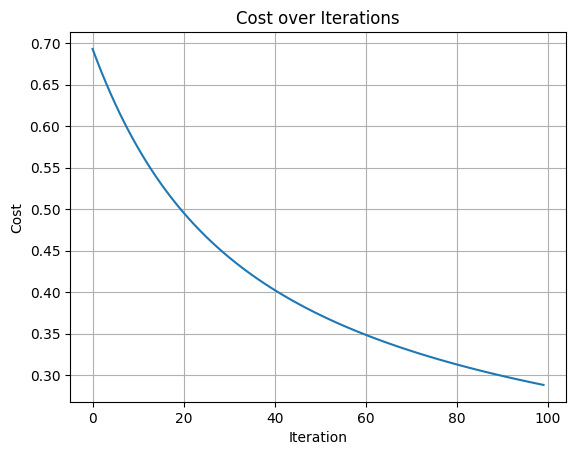

In [12]:
plt.plot(cost_history)
plt.title("Cost over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


### What the Plot Means:

- **Y-axis = Cost**
    
    → How *wrong* the model is. Higher = worse predictions.
    
- **X-axis = Iterations**
    
    → How many times we've run the training loop (forward + backprop + update).
    

---

### 🔁 What’s Happening Step-by-Step

1. **Early Iterations (Left side):**
    - We just started training.
    - The weights and bias are far from correct.
    - The model is making lots of wrong guesses.
    - 🔺 High cost.
2. **Later Iterations (Right side):**
    - After each update, the model adjusts the weights to reduce mistakes.
    - It starts to understand the pattern in the data better.
    - 🔻 Lower cost, better predictions!

---

### 💡 So you're absolutely right:

> As training continues, we tune the weights to make more accurate predictions, and that makes the cost go down 📉 — just like your plot shows!
>

This is why we track the cost function — it's our **learning progress bar**.

#🟦 Step 9: Visualize the Decision Boundary

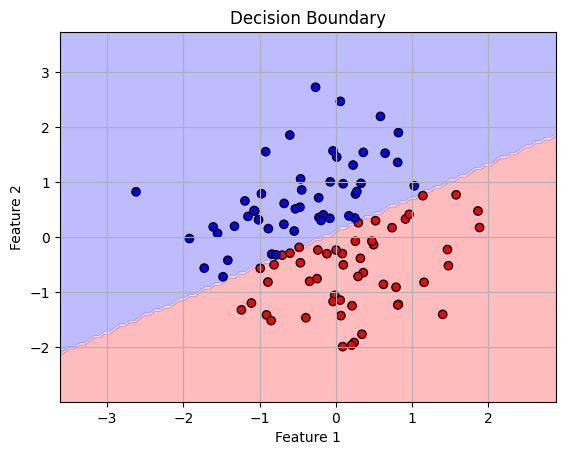

In [13]:
def predict(X, w, b):
    a = forward_prop(X, w, b)
    return (a > 0.5).astype(int)

# Create grid to visualize the decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

X_grid = np.c_[xx.ravel(), yy.ravel()]
preds = predict(X_grid, w_trained, b_trained).reshape(xx.shape)

plt.contourf(xx, yy, preds, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


### 🔷 What This Graph Shows

This is your **decision boundary** plot. It shows how your model classifies the space based on the weights it learned:

- **Red Region:** The model thinks points here belong to **Class 1** (label = 1)
- **Blue Region:** The model thinks points here belong to **Class 0** (label = 0)
- **Line Between Them:** That’s the **decision boundary**. It’s where the model is *unsure* (predicts 0.5).

---

### 🔴🔵 What About the Dots?

- **Red Dots:** Real data points that are labeled as Class 1 (actual = 1)
- **Blue Dots:** Real data points that are labeled as Class 0 (actual = 0)

✅ **Correct prediction**: Dot is in the correct colored region (e.g. red dot in red area)

❌ **Wrong prediction**: Dot is in the opposite region (e.g. red dot in blue area)

---

### 🧠 So How to Read It:

- Red dots **below the line** → Correctly predicted as class 1 ✅
- Blue dots **above the line** → Correctly predicted as class 0 ✅
- Any dot on the “wrong side” of the line → Misclassified ❌

---

### ✅ What You Got Right:

> "Minus on the axes = blue dots with wrong prediction"
>
>
> Almost! It’s not about the minus or plus, but **which side of the boundary line** they fall on.
>